<br> 

![btom.png](btom.png)

# 1. Introduction

Imagine you are living in Berlin and now you have to change the job. Let the best job you can find be in Munich. So the question is, can one find at least some neighborhood which is comparable to my actual one. In the following this answer will be tried to be solved by analyzing the local structure of the city, by means of venues in a neighborhood, extracted by the Foursquare API. From this, similarities in the neighborhood in Berlin and Munich will be analyzed. This will be done by extracting the structures of the cities from public accessible sources and and than a comparison of the different features (namely the venues) of the cities. By clustering of similar neighborhood possible recommendations can be given, for neighborhood’s, which are in some respect similar in Berlin and Munich.



# 2. Table of Contents

# 3. Methods

### 3.1 Python libraries
1. __Pandas__: <br>
Pandas is a software library written for the Python programming language for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series. In this work Pandas is used through the whole analysis process as main data structure. More on Pandas can be found at: https://pandas.pydata.org/<br>
<br>

2. __Requests:__<br>
Requests a Python HTTP library, enabling HTTP requests on a simpler and more human-friendly way. In this work Request is used to access HTTP data from the web. More on Request can be found at: https://docs.python-requests.org/en/master/<br>
<br>
3. __BeatifulSoup:__<br>
Beautiful Soup is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.
More on BeatifulSoup can be found at: https://www.crummy.com/software/BeautifulSoup/<br>
4. __docx:__<br>
python-docx is a Python library for creating and updating Microsoft Word (.docx) files
More on docx can be found at: https://python-docx.readthedocs.io/en/latest/<br>
5. __os:__<br>
This module provides a portable way of using operating system dependent functionality. More on os can be found at: https://docs.python.org/3/library/os.html<br>
6. __geocoder:__<br>
Geocoder is a simple and consistent geocoding library written in Python. In the frame of this work it is used to get Geo Coordinates for a given location based on the name. There are a huge amount of different providers for this information like Google, Bing, OSM. In this work the geoinfomarions of ARCGis are used. More on geocoder can be found at: https://geocoder.readthedocs.io/<br>
8. __Foursquare API:__<br>
Foursquares is a customer based app for geoinformations based on recommendations of local venues. It provides an API for developers to get local information based on there venues database. In this work it is used to get lokal venues based on neighborhoods in a city to compare this to other neighborhoods in other cities.
More on Foursquare API can be found at: https://foursquare.com/<br>
9. __folium:__<br>
Folium is a geomapping framework to map data on interactive maps. it builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the leaflet.js library. More on folium can be found at: https://python-visualization.github.io/folium/<br>
10. __sklearn:__<br>
Sklear is a free sowtware libary for machine learning in Python. It provides different classifications, regression and clustering algorithm.  More on sklearn can be found at: https://scikit-learn.org/stable/<br>

11. __matplotlib:__<br>
Matplotlib is a plotting library in Python. It is used to plot different data. More on Matplotlib caqn be found at https://matplotlib.org/<br>

12. __geopandas:__<br>
GeoPandas is an open source project for working with geospatial data in python. It extends the data types used by pandas to allow spatial operations on geometric types. Here it is used for plotting the neighborhoods of berlin. More on Geopandas can be found at https://geopandas.org/. <br>

<br>

#### 3.2 machine learning algorithm


1. __sklearn kmeans__:<br>
The k-means Algorithm is a method vor vectorquantisation, also used for clusteranalysis. A given Quantity of similar objects is diveded into a given amount of groups k by similarity. 
Mathematically this means that the distance of the sum of the squared displacement from the cluster centroid $\mu_i$ has to minimized. This means the optimization of the funktion:<br>
$$J=\sum _{{i=1}}^{{k}}\sum _{{{\mathbf x}_{j}\in S_{{i}}}}{\|{\mathbf x}_{j}-{\boldsymbol \mu }_{i}\|^{2}}$$<br>
where $x_j$ denotes the data points and  $μ_i$ the centroid of the cluster $S_i$. 
In case of the sklearn implementation the k-means problem is solved using either Lloyd’s or Elkan’s algorithm.\}

2. __scipy.cluster.hierarchy.linkage__:<br>
The linkage methods are used to compute the distance $d(s,t)$ between two clusters $s$ and $t$. The algorithm begins with a forest of clusters. When two clusters $s$ and $t$ from this forest are combined into a single cluster $u$, $s$ and $t$ are removed from the forest, and $u$ is added to the forest. When only one cluster remains in the forest, the algorithm stops, and this cluster becomes the root. At each iteration a distance matrix $d$ is maintaied, with $d(i,j)$ corresponding to the distance between cluster $i$ and $j$. In this study the distance is derived by the uses the Ward variance minimization algorithm.


3. __scipy.cluster.hierarchy.dendrogramm__:<br>
The dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children. The top of the U-link indicates a cluster merge. The two legs of the U-link indicate which clusters were merged. The length of the two legs of the U-link represents the distance between the child clusters. It is also the  distance between original observations in the two children clusters.

# 4. Data
Here the used data will be described, extracted, transformed and loaded do be saved as pickel files for the main part of the analysis.

## 4.1 Above the Data

### 4.1.1 Berlin



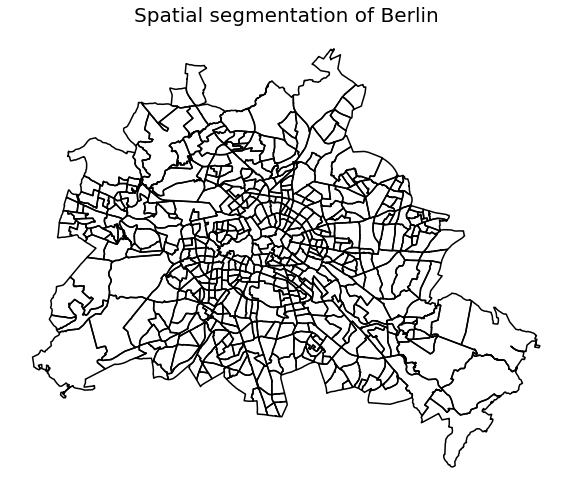

In [71]:
#importing Geopandas for reading the shape files .shp
import geopandas as gpd
#importing matplotlib for plotting
import matplotlib.pyplot as plt

#load the shape file
shp_path = 'lor_plr.shp'
sf = gpd.read_file(shp_path)

#plot the neighborhoods of Berlin
sf.boundary.plot( color="black",figsize=(10, 10))
plt.axis('off')
plt.title('Spatial segmentation of Berlin',{'fontsize': 20})
plt.show()


### 4.2 Munich

https://de.wikipedia.org/wiki/Stadtbezirke_M%C3%BCnchens

The municipal districts of Munich represent an administrative division of the urban area of the Bavarian state capital Munich. The data for the individual Neighborhoods can be extracted from a table present on the wikipedia (german) page "Stadtbezirke Münchens". The page can be obtained by the link shown above.

<img src="Munich.png" alt="Drawing" style="width: 500px;"/>

## 5. Data extraction

### 5.1 Berlin

First we need to import the needed packages. As shown above we can get the data for the segmentation of Berlin in form of an Table embedded in a word .docx file. This data can be scaped by using the docx libary.

In [72]:
import numpy as np
import pandas as pd

import requests

#word scraping
from docx.api import Document

# import the regular expression package
import re

In [73]:
document = Document('LOR-Schluesselsystematik_2021.docx')
table = document.tables[0]


data = []

keys = None
for i, row in enumerate(table.rows):
    text = (cell.text for cell in row.cells)

    if i == 0:
        keys = tuple(text)
        continue
    row_data = dict(zip(keys, text))
    data.append(row_data)

Lets have a look into the table.

In [74]:
df = pd.DataFrame(data)
df.head()

,PGR \nID,PGR Name,BZR ID,BZR Name,PLR ID,PLR Name,EW 31.12.19
0,01 Mitte,01 Mitte,01 Mitte,01 Mitte,01 Mitte,01 Mitte,01 Mitte
1,0110,Zentrum,011001,Tiergarten Süd,01100101,Stülerstraße,3.445
2,0110,Zentrum,011001,Tiergarten Süd,01100102,Großer Tiergarten,1.755
3,0110,Zentrum,011001,Tiergarten Süd,01100103,Lützowstraße,5.159
4,0110,Zentrum,011001,Tiergarten Süd,01100104,Körnerstraße,4.626


* first introduce a column for the borough
* drop column *BZR ID* , *PGR \nID*, *PLR ID* and *EW 31.12.19*
* there are some headline rows which we need to eliminate
* the header is not very intuitive lets change it also

In [75]:
#filter the borough id for Boroughs by reguar expressions

reg = '[0-9][0-9][0-9][0-9][0-9][0-9]'
Borough =[]

for idx, item in enumerate(df['BZR ID']):
    if re.search(reg, item) == None:
        if item.find('gesamt') != -1:
            Borough.append(temp)
            
        else:
            #print(item.split(reg))
            #print(item[2:])
            Borough.append(item[2:])
            temp = item[2:]
            
    else:  
        Borough.append(temp)
        
df['Borough'] = Borough           

In [76]:
# now drop column BZR ID and PGR \nID and EW 31.12.19

df_PLR = df.drop(['PGR \nID'], axis=1)
df_PLR= df_PLR.drop(['BZR ID'], axis=1)
df_PLR= df_PLR.drop(['EW 31.12.19'], axis=1)
df_PLR= df_PLR.drop(['PLR ID'], axis=1)

In [77]:
#now remove headline rows

reg = '[0-9][0-9]'


for idx, item in enumerate(df_PLR['BZR Name']):
    if item.find('gesamt') != -1:
        df_PLR=df_PLR.drop([idx])
        
    elif re.search(reg, item) != None:
        df_PLR=df_PLR.drop([idx])
        
df_PLR.reset_index();        

now rename the columns and reshape the Dataframe

In [78]:
df_PLR.columns=['Region', 'Sub-Borough', 'Neighborhood','Borough']
df_PLR = df_PLR[['Region','Borough', 'Sub-Borough', 'Neighborhood']]
df_PLR.head()

,Region,Borough,Sub-Borough,Neighborhood
1,Zentrum,Mitte,Tiergarten Süd,Stülerstraße
2,Zentrum,Mitte,Tiergarten Süd,Großer Tiergarten
3,Zentrum,Mitte,Tiergarten Süd,Lützowstraße
4,Zentrum,Mitte,Tiergarten Süd,Körnerstraße
6,Zentrum,Mitte,Regierungsviertel,Wilhelmstraße


#### 5.1.1 Save the Dataframe for further analysis

this will be tone by the pandas save to pickle function

In [79]:
df_PLR.to_pickle('berlin.pkl')

### 5.2 Munich

Lets come to Munich!

In the case of Munich we find the need spacial order of Munich in a Wikipedia table as described above.
In the present case we will use the BeatifulSoup4 packagde to extract the data.

In [80]:
#import BeautifulSoup
from bs4 import BeautifulSoup
wikisite=requests.get("https://de.wikipedia.org/wiki/Stadtbezirke_M%C3%BCnchens").text
table = BeautifulSoup(wikisite, "lxml")

ok lets extract the data

In [81]:
munich_table = table.findAll("table", attrs={"class": "wikitable sortable"})[1]
rows = munich_table.find_all('tr')

column1=[]
column2=[]
column0=[]


# loop over all rows, get all cells
for row in rows:
    try:
        cells = row.find_all('td')

        column1.append(cells[1].text)
        column2.append(cells[2].text)
        column0.append(cells[0].text)
        
    except:
        pass


lets create the DataFrame

In [82]:
column_names = ['Stadtbezirks nr.','Stadbezirk','Stadtbezirksteil']

Bezirke = pd.DataFrame(columns=column_names)

In [83]:
#read all the data into the Pandas frame
for idx, rows in enumerate(column0):
     Bezirke = Bezirke.append({'Stadtbezirks nr.':column0[idx],
                                'Stadbezirk': column1[idx],
                                'Stadtbezirksteil': column2[idx]},ignore_index=True)
Bezirke.head()

,Stadtbezirks nr.,Stadbezirk,Stadtbezirksteil
0,1,Altstadt-Lehel,"Graggenau (1), Angerviertel (2), Hackenviertel..."
1,2,Ludwigsvorstadt-Isarvorstadt,"Gärtnerplatz (1), Deutsches Museum (2), Glocke..."
2,3,Maxvorstadt,"Königsplatz (1), Augustenstraße (2), St. Benno..."
3,4,Schwabing-West,"Neuschwabing (1), Am Luitpoldpark (2), Schwere..."
4,5,Au-Haidhausen,"Maximilianeum (1), Steinhausen (2), Haidhausen..."


ok thats looks not to bad <br>

<font color='grey'>btw: *Stadbezirk* is borough and *Stadtbezirksteil* is neighborhood </font>

ok lets expand the dataframe that we have all the neighborhoods seperated

In [84]:
for idx, items in enumerate(Bezirke['Stadtbezirksteil']):
    foo = str.split(Bezirke.iloc[idx,2],',')
    borough = []
    for item2 in foo:
        if item2.find('(') == -1:
                borough.append(item2)
                
        else:  
                borough.append(item2[:item2.find("(")])
        Bezirke.iloc[idx,2]=borough
Bezirke=Bezirke.explode('Stadtbezirksteil').reset_index(drop=True) 

for idx, item in enumerate(Bezirke['Stadtbezirksteil']):
    Bezirke.iloc[idx,2]=item.strip()

In [85]:
Bezirke.head()

,Stadtbezirks nr.,Stadbezirk,Stadtbezirksteil
0,1,Altstadt-Lehel,Graggenau
1,1,Altstadt-Lehel,Angerviertel
2,1,Altstadt-Lehel,Hackenviertel
3,1,Altstadt-Lehel,Kreuzviertel
4,1,Altstadt-Lehel,Lehel


looks fine <br>
just remove the '*Stadtbezirks nr.*'
and translate the header to english


In [86]:
Bezirke.drop('Stadtbezirks nr.',axis=1, inplace=True)
Bezirke.columns=['Borough','Neighborhood']

In [87]:
Bezirke.head()

,Borough,Neighborhood
0,Altstadt-Lehel,Graggenau
1,Altstadt-Lehel,Angerviertel
2,Altstadt-Lehel,Hackenviertel
3,Altstadt-Lehel,Kreuzviertel
4,Altstadt-Lehel,Lehel


#### 5.2.1 Save the Dataframe with pickle

In [88]:
Bezirke.to_pickle('munich.pkl')

# 6. Data Analysation

lets first load the packages needed for this section

In [89]:
import numpy as np
import pandas as pd

import requests
import lxml.html as lh
import re

import geocoder 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
print('all packages loaded!')

all packages loaded!


So lets start the analysis with the previous saved Pandas DataFrames.

In [90]:
#load the Dataframes
df_munich = pd.read_pickle('munich.pkl')
df_berlin = pd.read_pickle('berlin.pkl')

how are the data frames look like?

In [91]:
print(df_munich.head())
print(df_berlin.head())

          Borough   Neighborhood
0  Altstadt-Lehel      Graggenau
1  Altstadt-Lehel   Angerviertel
2  Altstadt-Lehel  Hackenviertel
3  Altstadt-Lehel   Kreuzviertel
4  Altstadt-Lehel          Lehel
    Region Borough        Sub-Borough       Neighborhood
1  Zentrum   Mitte     Tiergarten Süd       Stülerstraße
2  Zentrum   Mitte     Tiergarten Süd  Großer Tiergarten
3  Zentrum   Mitte     Tiergarten Süd       Lützowstraße
4  Zentrum   Mitte     Tiergarten Süd       Körnerstraße
6  Zentrum   Mitte  Regierungsviertel      Wilhelmstraße


ok first we need to shape them into the same format

In [92]:
df_berlin.drop(['Region'], axis=1, inplace = True)
df_berlin.drop(['Sub-Borough'], axis=1, inplace = True)


now we add a city column

In [93]:
city =[]
for idx, item in enumerate(df_berlin['Borough']):
    city.append('Berlin')
df_berlin['city']= city   
city =[]
for idx, item in enumerate(df_munich['Borough']):
    city.append('Munich')
df_munich['city']= city     

In [94]:
print(df_munich.head())
print(df_berlin.head())

          Borough   Neighborhood    city
0  Altstadt-Lehel      Graggenau  Munich
1  Altstadt-Lehel   Angerviertel  Munich
2  Altstadt-Lehel  Hackenviertel  Munich
3  Altstadt-Lehel   Kreuzviertel  Munich
4  Altstadt-Lehel          Lehel  Munich
  Borough       Neighborhood    city
1   Mitte       Stülerstraße  Berlin
2   Mitte  Großer Tiergarten  Berlin
3   Mitte       Lützowstraße  Berlin
4   Mitte       Körnerstraße  Berlin
6   Mitte      Wilhelmstraße  Berlin


### 6.1 merge the dataframes

In [95]:
frames = [df_berlin, df_munich]

Merged_hoods = pd.concat(frames)

#just reorder it for a more natural appearance
Merged_hoods = Merged_hoods[['city', 'Borough', 'Neighborhood']]

Merged_hoods

,city,Borough,Neighborhood
1,Berlin,Mitte,Stülerstraße
2,Berlin,Mitte,Großer Tiergarten
3,Berlin,Mitte,Lützowstraße
4,Berlin,Mitte,Körnerstraße
6,Berlin,Mitte,Wilhelmstraße
...,...,...,...
102,Munich,Feldmoching-Hasenbergl,Hasenbergl-Lerchenau Ost
103,Munich,Feldmoching-Hasenbergl,Ludwigsfeld
104,Munich,Feldmoching-Hasenbergl,Lerchenau West
105,Munich,Laim,Friedenheim


### 6.2 coordinates for every neighborhood <br>



first a small funktion for a progressbar

In [96]:
import time

# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

and now get the coordinates <br>
<font color='grey'>btw: that needs some time get a coffee or tee</font>

In [97]:
# Initial call to print 0% progress
l=len((Merged_hoods['city']))
printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)


# initialize your variable to None
latitude =[]
longitude=[]

t=0

for row in zip(Merged_hoods['city'], Merged_hoods['Borough'],Merged_hoods['Neighborhood']):
    
    Lokation =  row[0]+' '+row[1]+' '+row[2]
    #print(Lokation)
    lat_lng_coords = None
    i=0
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}'.format(Lokation)) #arcgis worked!!
        #print(i,g)
        lat_lng_coords = g.latlng
        i+=1
    
    
    
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    
    #update progress bar
    time.sleep(0.1)
    printProgressBar(t + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
    t+=1
  
print('done')

Progress: |██████████████████████████████████████████████████| 100.0% Complete
done


and append it to the Dataframe

In [98]:
#append the coordiantes
Merged_hoods['Latitude'] = latitude
Merged_hoods['Longitude'] = longitude

In [99]:
Merged_hoods.head()

,city,Borough,Neighborhood,Latitude,Longitude
1,Berlin,Mitte,Stülerstraße,52.507528,13.348435
2,Berlin,Mitte,Großer Tiergarten,52.509930,13.363930
3,Berlin,Mitte,Lützowstraße,52.503663,13.362630
4,Berlin,Mitte,Körnerstraße,52.501515,13.367190
6,Berlin,Mitte,Wilhelmstraße,52.513446,13.382372


### 6.3 Foursquares API for extracting the venues in the vicinity of each location

first the credentials

In [129]:
CLIENT_ID = '.....' # your Foursquare ID
CLIENT_SECRET = '.....' # your Foursquare Secret
VERSION = '....' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

second we define a function to extract the informations

In [130]:
def getNearbyVenues(names, latitudes, longitudes, radius=600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

and now make the API call

In [ ]:
# get info
all_venues = getNearbyVenues(names=Merged_hoods['Neighborhood'],
                                   latitudes=Merged_hoods['Latitude'],
                                   longitudes=Merged_hoods['Longitude']
                                  )
print('done')

### 6.4 Catergorize the Neighborhoods by venues

In [145]:
# one hot encoding
all_onehot = pd.get_dummies(all_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
all_onehot['Neighborhood'] = all_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [all_onehot.columns[-1]] + list(all_onehot.columns[:-1])
all = all_onehot[fixed_columns]

all_onehot.head()



,ATM,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

__ok sort by the 10 most commen venue types__

In [177]:
all_grouped = all_onehot.groupby('Neighborhood').mean().reset_index()

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = all_grouped['Neighborhood']

for ind in np.arange(all_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(all_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ackerstraße,Italian Restaurant,Bus Stop,Supermarket,IT Services,Argentinian Restaurant,Pizza Place,Athletics & Sports,Greek Restaurant,Paper / Office Supplies Store,Peruvian Restaurant
1,Adele-Sandrock-Straße,Zoo Exhibit,Hotel,Restaurant,Cocktail Bar,German Restaurant,Art Museum,Clothing Store,Theater,Movie Theater,Monument / Landmark
2,Afrikanische Straße,Restaurant,Café,Fried Chicken Joint,Hookah Bar,Seafood Restaurant,Metro Station,Indian Restaurant,Movie Theater,Rental Car Location,Pakistani Restaurant
3,Ahrensfelder Berge,Supermarket,Drugstore,Organic Grocery,Café,Italian Restaurant,Paper / Office Supplies Store,Hardware Store,Gym / Fitness Center,Gym,German Restaurant
4,Alexanderplatzviertel,Clothing Store,Coffee Shop,Optical Shop,Italian Restaurant,Café,Bookstore,Cosmetics Shop,German Restaurant,Vietnamese Restaurant,Plaza


now lets draw a dendrogram to check for a propper amount of cluster

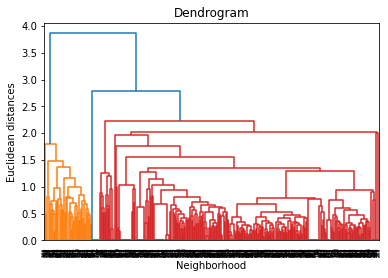

In [178]:
all_grouped_clustering = all_grouped.drop('Neighborhood', 1)

X = all_grouped_clustering

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('Neighborhood')
plt.ylabel('Euclidean distances')
plt.show()

ok looks like 10 is a good choiche

### 6.5 k means clustering

now lets cluster the neighborhoods bei there venues

[[281   0]
 [ 76   1]
 [ 14   2]
 [ 16   3]
 [  6   4]
 [254   5]]


<BarContainer object of 6 artists>

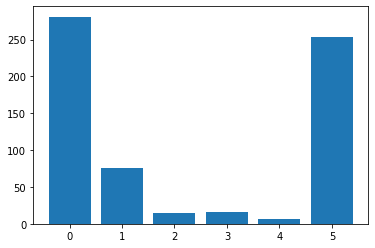

In [179]:
kclusters = 6


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#print(kmeans.labels_)

#and occurence
unique, counts = np.unique(kmeans.labels_, return_counts=True)

#check the occurence for each cluster
A=np.asarray((counts, unique)).T
X=A[:,1]
Y=A[:,0]
print(A)


plt.bar(X,Y,align='center')

we can see to main cluster nr 1 and nr 3

In [180]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#print(neighborhoods_venues_sorted)

#df is the data frame contaning the information on every single neighberhood
all_merged = Merged_hoods

# merge all_grouped with all_data to add latitude/longitude for each neighborhood
all_merged = all_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
all_merged = all_merged.dropna()
all_merged['Cluster Labels']=all_merged['Cluster Labels'].astype('int')
all_merged.head() # check the last columns

,city,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Berlin,Mitte,Stülerstraße,52.507528,13.348435,0,Hotel,Zoo Exhibit,Café,Lounge,Hotel Bar,Italian Restaurant,Breakfast Spot,German Restaurant,Sushi Restaurant,Spa
2,Berlin,Mitte,Großer Tiergarten,52.509930,13.363930,0,Art Museum,Concert Hall,Restaurant,Memorial Site,Indie Movie Theater,Gym / Fitness Center,Sculpture Garden,Hostel,Tunnel,Hotel
3,Berlin,Mitte,Lützowstraße,52.503663,13.362630,0,Hotel,Art Gallery,German Restaurant,Bar,Restaurant,Breakfast Spot,Lounge,Bus Stop,Soup Place,Cocktail Bar
4,Berlin,Mitte,Körnerstraße,52.501515,13.367190,0,Hotel,Café,Restaurant,Art Gallery,Bakery,Bar,Park,Cocktail Bar,Gastropub,Ice Cream Shop
6,Berlin,Mitte,Wilhelmstraße,52.513446,13.382372,0,Clothing Store,Hotel,Hotel Bar,Supermarket,Coffee Shop,Restaurant,Plaza,Gourmet Shop,Department Store,German Restaurant


In [181]:
#save the df for later
all_merged.to_pickle('all_merged.pkl')

### 6.5 Data visualisation

lets visualize the data on a folium map for __Berlin__

In [182]:
g = geocoder.arcgis('Berlin, Berlin')
g.latlng
t_latitude=g.latlng[0]
t_longitude=g.latlng[1]

# create map
map_clusters = folium.Map(location=[t_latitude, t_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, PLR, city in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels'], all_merged['Borough'], all_merged['city']):
    label = folium.Popup(str(city)+','+str(poi) + ', ' +str(PLR) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

lets visualize the data on a folium map for __Munich__

In [183]:
g = geocoder.arcgis('Munich, Bavaria')
g.latlng
t_latitude=g.latlng[0]
t_longitude=g.latlng[1]

# create map
map_clusters = folium.Map(location=[t_latitude, t_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, PLR, city in zip(all_merged['Latitude'], all_merged['Longitude'], all_merged['Neighborhood'], all_merged['Cluster Labels'], all_merged['Borough'], all_merged['city']):
    label = folium.Popup(str(city)+','+str(poi) + ', ' +str(PLR) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 6.7 investigation on the cluster properties <br>

first Cluster 0

In [184]:
all_merged.loc[all_merged['Cluster Labels'] == 0, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]].describe(include = 'object')

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,281,281,281,281,281,281,281,281,281,281,281
unique,32,44,53,56,63,66,64,67,80,75,71
top,Charlottenburg-Wilmersdorf,Supermarket,Hotel,Supermarket,Bar,Pub,Café,Gym / Fitness Center,Rock Club,Nightclub,Hotel
freq,35,43,30,27,24,26,34,38,22,22,30


second Cluster 5

In [185]:
all_merged.loc[all_merged['Cluster Labels'] == 5, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]].describe(include = 'object')

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,255,255,255,255,255,255,255,255,255,255,255
unique,30,19,35,36,43,50,50,58,66,63,66
top,Pankow,Café,Café,Drugstore,Italian Restaurant,Bakery,Ice Cream Shop,Supermarket,Sushi Restaurant,Clothing Store,Dance Studio
freq,38,161,45,29,35,34,30,33,26,26,24


cluster 1

In [186]:
all_merged.loc[all_merged['Cluster Labels'] == 1, all_merged.columns[[1] + list(range(5, all_merged.shape[1]))]].describe(include = 'object')

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
count,76,76,76,76,76,76,76,76,76,76,76
unique,19,8,11,26,29,25,25,21,18,16,12
top,Spandau,Bus Stop,Bus Stop,Drugstore,Drugstore,Pet Store,Pet Café,Pet Café,Peruvian Restaurant,Persian Restaurant,Pet Café
freq,24,33,31,8,6,10,10,12,12,12,15


While for cluster 0 the most important features are supermarkets hotels and bars, cluster 5 is manly characterized by cafe drugstores and restaurants. Cluster 1 is characterised by a lower shop and restaurant density since bus stops are the most pronounced featuresCluster 6 is the second biggest cluster with the top bourough Lichtenberg. This is an area with a high amount of supermarkets, restaurants and Bakeries.

# 7. Discussion

To compare the to cities one can say that in the case of Munich the cities neighbourhoods a very scattered, with almost all kinds of cluster present.  Berlin is in this sense much more structured with clusters the inner city are mostly part of type 0 and 5. The other cluster types are more located in the outskirts of the cities.

# 8. Summary and Conclusions

In summary it was shown that by clustering Berin and Munich based on local venues, it is possible to categorize the neighborhood in both cities. Based on these categories it is possible to give recommendations for finding similar neighbourhoods in both cities.
